In [12]:
# regression-multiple-methods.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
# To ensure reproducibility
np.random.seed(42)

# Read data from Excel file
file_path = '../data/regression-multiple-methods.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

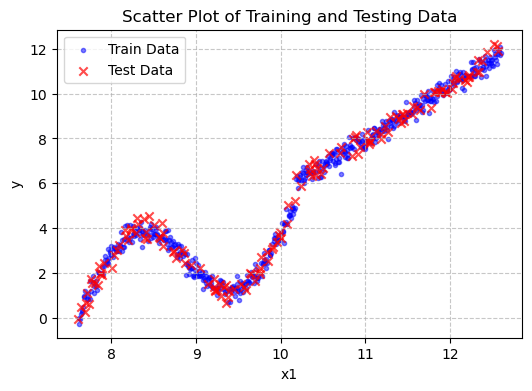

In [14]:
# Scatter Plot with 'x1' and 'y' columns ---

# Select the specified columns
x_train = train_data['x1']
y_train = train_data['y']
x_test = test_data['x1']
y_test = test_data['y']

# Create the scatter plot
plt.figure(figsize=(6, 4))

# Scatter plot for training data (blue circles)
plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.5, marker='.')

# Scatter plot for test data (red crosses)
plt.scatter(x_test, y_test, color='red', label='Test Data', alpha=0.7, marker='x')

# Add titles, labels, and legend
plt.title('Scatter Plot of Training and Testing Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [15]:
# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [ ]:
# # Adding outliers (UNCOMMENT ONLY WHEN REQUIRED! SEE THE PROBLEM STATEMENTs ...)
# X_train = np.array(list(X_train['x1']) + [X_train['x1'].mean() + x for x in np.random.randn(5)]).reshape(-1,1)
# y_train = np.array(list(y_train) + [y_train.max() + 4 + x for x in np.random.randn(5)])

In [16]:
# Use PolynomialFeatures to create new features features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
# standardization of the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [18]:
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_train_poly, columns=feature_names)
augmented_data['y'] = train_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_train_data.csv', index=False)
####################################
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_test_data.csv', index=False)
####################################

In [29]:
# Algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    'SVM Regression': SVR(kernel='poly'),  # Adjust kernel as needed
    'RandomForest': RandomForestRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(),
    'Neural Network-10': MLPRegressor(hidden_layer_sizes=[10], max_iter=20000),
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

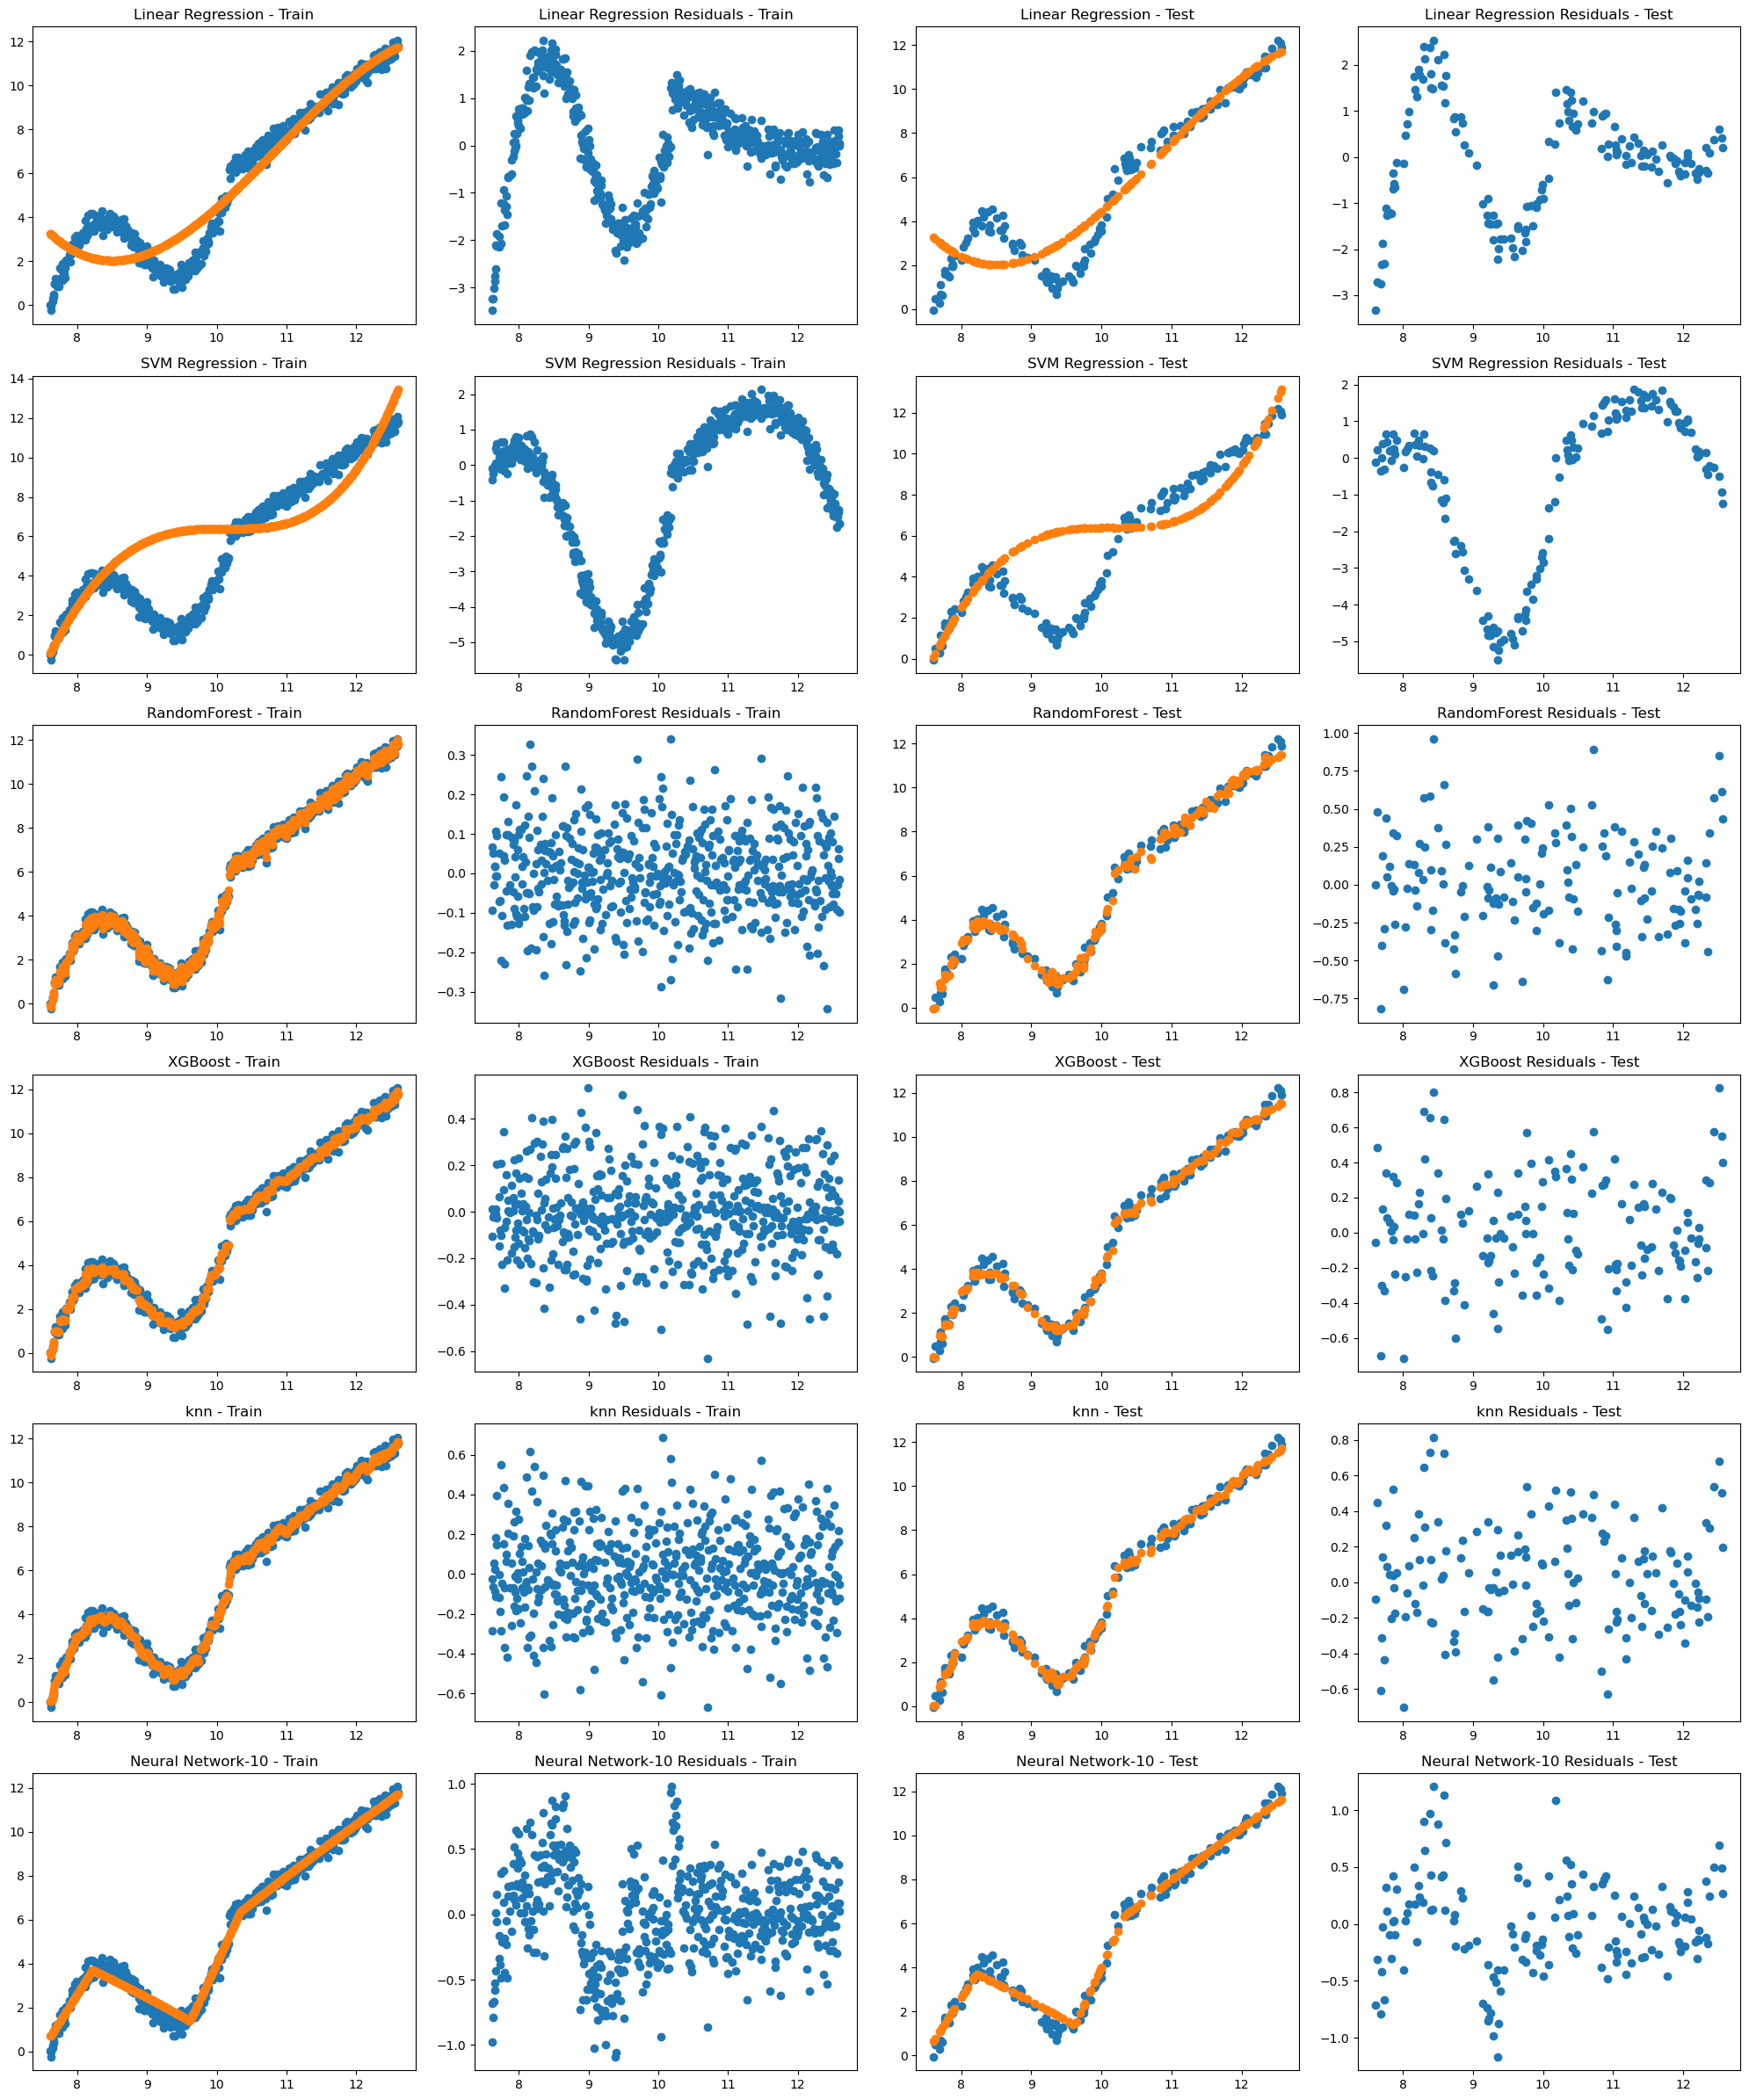

In [ ]:
# Create a grid of subplots
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
fig_row = -1

# Run the algorithms ... create metrics and plots
for algorithm_name, algorithm in algorithms.items():
    
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)

    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)

    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

    # Create the plots
    fig_row = fig_row+1

    axs[fig_row, 0].scatter(X_train, y_train)
    axs[fig_row, 0].scatter(X_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")

    axs[fig_row, 1].scatter(X_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

    axs[fig_row, 2].scatter(X_test, y_test)
    axs[fig_row, 2].scatter(X_test, y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")

    axs[fig_row, 3].scatter(X_test, residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [28]:
# Display the metrics' Tables
print("Metrics - Train Data:\n")
#sort by R-squared in descending order
metric_table_train_sorted = metric_table_train.sort_values(by='R-squared', ascending=False)
print(metric_table_train_sorted.to_string())
print("-------------------------------------------------")


print("Metrics - Test Data:\n")
#sort by R-squared in descending order
metric_table_test_sorted = metric_table_test.sort_values(by='R-squared', ascending=False)
print(metric_table_test_sorted.to_string())

Metrics - Train Data:

                   R-squared      RMSE  Durbin-Watson  Jarque-Bera    JB P-value
Linear Regression   0.905822  1.060184       0.105657    16.909651  2.128707e-04
SVM Regression      0.569560  2.266543       0.023169    63.614047  1.535979e-14
-------------------------------------------------
Metrics - Test Data:

                   R-squared      RMSE  Durbin-Watson  Jarque-Bera  JB P-value
Linear Regression    0.88699  1.183631       0.127507     1.239081    0.538192
SVM Regression       0.58683  2.263192       0.036915    21.865501    0.000018


In [ ]:
# Metrics - Train Data:

#                    R-squared      RMSE  Durbin-Watson  Jarque-Bera    JB P-value
# Linear Regression   0.833674  1.408923       0.059761    51.466506  6.670987e-12
# SVM Regression      0.545415  2.329245       0.021942    68.878362  1.104724e-15
# RandomForest        0.999000  0.109241       2.931659     3.769479  1.518686e-01
# XGBoost             0.997146  0.184549       2.372918     1.046859  5.924852e-01
# knn                 0.995929  0.220416       2.510498     0.705376  7.027965e-01
# Neural Network-10   0.939374  0.850625       0.162938    22.918092  1.055357e-05
# -------------------------------------------------
# Metrics - Test Data:

#                    R-squared      RMSE  Durbin-Watson  Jarque-Bera  JB P-value
# Linear Regression   0.818068  1.501800       0.079118    12.500550    0.001930
# SVM Regression      0.562991  2.327567       0.034813    23.409392    0.000008
# RandomForest        0.991747  0.319861       1.834557     0.904898    0.636068
# XGBoost             0.992842  0.297890       1.851431     1.003285    0.605535
# knn                 0.992994  0.294699       1.971390     0.972202    0.615020
# Neural Network-10   0.932186  0.916890       0.203631     3.434655    0.179545

                   r2_test                      r2_train                      \
degree                  1         6         10        1         6         10   
model                                                                          
LinearRegression  0.818068  0.972925  0.991865  0.833674  0.976261  0.992987   
SVR (RBF)         0.986837  0.946546  0.923388  0.989562  0.960738  0.943283   

                 rmse_test                     rmse_train                      
degree                  1         6         10         1         6         10  
model                                                                          
LinearRegression  1.501800  0.579348  0.317561   1.408923  0.532278  0.289298  
SVR (RBF)         0.403951  0.814043  0.974556   0.352954  0.684533  0.822742  


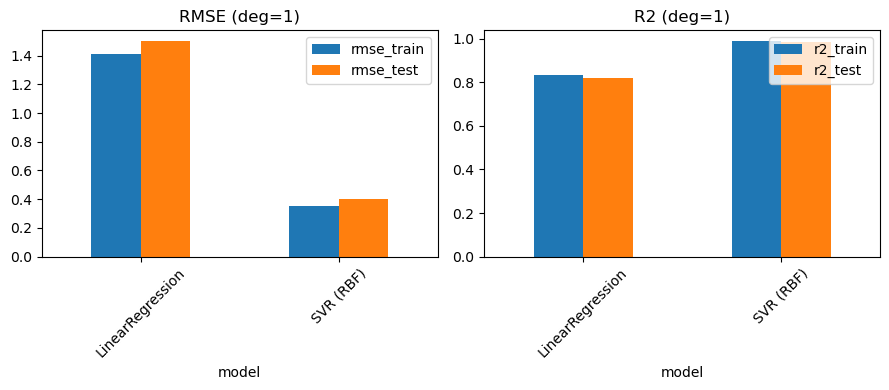

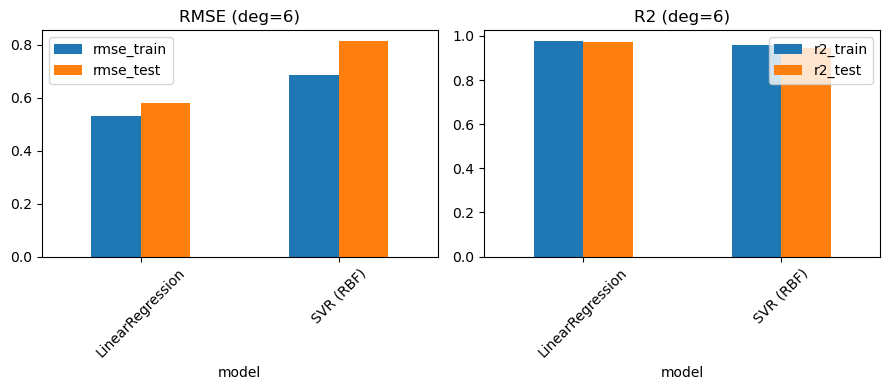

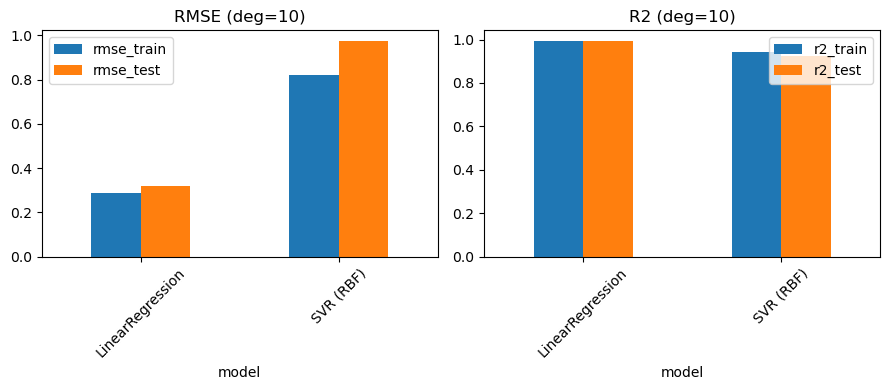

In [25]:
# Run experiments for degrees 1,6,10; collect metrics and plots for the six algorithms.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# reuse existing X_train, X_test, y_train, y_test from the notebook
degrees = [1, 6, 10]
algorithms = {
    'LinearRegression': LinearRegression(),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1),
    #'RandomForest': RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1),
    #'XGBoost/GBR': GradientBoostingRegressor(n_estimators=200, random_state=1),
    #'KNN': KNeighborsRegressor(n_neighbors=5),
   # 'NeuralNet': MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=1)
}

results = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    Xtr_poly = poly.fit_transform(X_train)    # X_train assumed defined earlier in notebook
    Xte_poly = poly.transform(X_test)
    scaler = StandardScaler()
    Xtr_scaled = scaler.fit_transform(Xtr_poly)
    Xte_scaled = scaler.transform(Xte_poly)

    for name, model in algorithms.items():
        # for LinearRegression we can skip scaling if desired; pipeline used for consistency
        mdl = model
        mdl.fit(Xtr_scaled, y_train)
        y_tr_pred = mdl.predict(Xtr_scaled)
        y_te_pred = mdl.predict(Xte_scaled)

        rmse_tr = np.sqrt(mean_squared_error(y_train, y_tr_pred))
        rmse_te = np.sqrt(mean_squared_error(y_test, y_te_pred))
        r2_tr = r2_score(y_train, y_tr_pred)
        r2_te = r2_score(y_test, y_te_pred)

        results.append({
            'degree': deg,
            'model': name,
            'rmse_train': rmse_tr,
            'rmse_test': rmse_te,
            'r2_train': r2_tr,
            'r2_test': r2_te
        })

# results DataFrame
df_res = pd.DataFrame(results)
print(df_res.pivot_table(index='model', columns='degree', values=['r2_train','r2_test','rmse_train','rmse_test']))

# quick plots: for each degree, bar chart of test RMSE and train RMSE
for deg in degrees:
    df_deg = df_res[df_res['degree']==deg].set_index('model')
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    df_deg[['rmse_train','rmse_test']].plot(kind='bar', rot=45, ax=plt.gca(), title=f'RMSE (deg={deg})')
    plt.tight_layout()
    plt.subplot(1,2,2)
    df_deg[['r2_train','r2_test']].plot(kind='bar', rot=45, ax=plt.gca(), title=f'R2 (deg={deg})')
    plt.tight_layout()
    plt.show()

# Optional: save df_res to CSV for later analysis
df_res.to_csv('poly_degree_model_results.csv', index=False)

In [24]:
# ...existing code...
# Evaluate degree=10 RMSEs for six models, with and without standardization

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import pandas as pd
import numpy as np

degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False)

# assume X_train, X_test, y_train, y_test already defined in the notebook
Xtr_poly = poly.fit_transform(X_train)
Xte_poly = poly.transform(X_test)

models = {
    'LinearRegression': LinearRegression(),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1),
    'XGBoost/GBR': GradientBoostingRegressor(n_estimators=200, random_state=1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'NeuralNet': MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=1)
}

rows = []
for scale_flag in [False, True]:
    if scale_flag:
        scaler = StandardScaler().fit(Xtr_poly)
        Xtr = scaler.transform(Xtr_poly)
        Xte = scaler.transform(Xte_poly)
        scaling = 'Standardized'
    else:
        Xtr = Xtr_poly.copy()
        Xte = Xte_poly.copy()
        scaling = 'No scaling'

    for name, mdl in models.items():
        m = clone(mdl)
        # Some models (MLP, SVR) may require/scales numeric stability — training may warn
        m.fit(Xtr, y_train)
        y_tr_pred = m.predict(Xtr)
        y_te_pred = m.predict(Xte)
        rmse_tr = np.sqrt(mean_squared_error(y_train, y_tr_pred))
        rmse_te = np.sqrt(mean_squared_error(y_test, y_te_pred))
        rows.append({'model': name, 'scaling': scaling, 'rmse_train': rmse_tr, 'rmse_test': rmse_te})

df_rmse = pd.DataFrame(rows)
print(f"Polynomial degree = {degree}\n")
print(df_rmse.pivot_table(index='model', columns='scaling', values=['rmse_train','rmse_test']).round(4))
# also show sorted by test rmse (standardized)
print("\nSorted by TEST RMSE (Standardized):")
print(df_rmse[df_rmse['scaling']=='Standardized'].sort_values('rmse_test').reset_index(drop=True))
# ...existing code...

Polynomial degree = 10

                     rmse_test                 rmse_train             
scaling             No scaling Standardized    No scaling Standardized
model                                                                 
KNN               2.935000e-01       0.2935  2.213000e-01       0.2213
LinearRegression  4.961000e-01       0.3176  4.543000e-01       0.2893
NeuralNet         8.288562e+07       0.3347  8.536780e+07       0.2995
RandomForest      3.188000e-01       0.3201  1.087000e-01       0.1087
SVR (RBF)         1.079100e+00       0.9746  9.770000e-01       0.8227
XGBoost/GBR       3.061000e-01       0.3081  1.581000e-01       0.1581

Sorted by TEST RMSE (Standardized):
              model       scaling  rmse_train  rmse_test
0               KNN  Standardized    0.221345   0.293507
1       XGBoost/GBR  Standardized    0.158081   0.308113
2  LinearRegression  Standardized    0.289298   0.317561
3      RandomForest  Standardized    0.108675   0.320088
4         Neura

# Function / Class | Description (inputs, main parameters, outputs)

| Function / Class | Description (inputs, main parameters, outputs) |
|---|---|
| sklearn.preprocessing.PolynomialFeatures | Generates polynomial and interaction features from input X. Key params: degree (int, default=2) — max degree; include_bias (bool) — whether to add constant 1 column; interaction_only (bool). Input: X (n_samples, n_features). Output: transformed array with shape (n_samples, n_output_features). Methods: fit, transform, fit_transform. Column names via get_feature_names_out(). |
| sklearn.preprocessing.StandardScaler | Standardizes features by removing mean and scaling to unit variance. Key params: with_mean, with_std. Input: X (n_samples, n_features). After fit: attributes mean_, scale_. Methods: fit, transform, fit_transform. Output: scaled array. |
| sklearn.linear_model.LinearRegression | Ordinary least squares linear regression. Key params: fit_intercept (bool), n_jobs (parallel coef computation). Input to fit: X (n_samples, n_features), y (n_samples,) or (n_samples, n_targets). Methods: fit, predict, score. Outputs: coef_ (coefficients), intercept_. score() returns R². |
| sklearn.svm.SVR | Support Vector Regression. Key params: kernel ('linear','rbf','poly'), C (regularization), degree (for poly), gamma, epsilon (tube size). Input: X, y. Methods: fit, predict, score. Outputs: predictions; score() gives R². |
| sklearn.ensemble.RandomForestRegressor | Ensemble of decision trees for regression. Key params: n_estimators, max_depth, min_samples_split, random_state, n_jobs. Input: X, y. Methods: fit, predict, score. Outputs: feature_importances_, estimator ensemble; score() = R² by default. |
| sklearn.ensemble.GradientBoostingRegressor | Gradient boosting for regression. Key params: loss, learning_rate, n_estimators, max_depth, subsample. Input: X, y. Methods: fit, predict, score. Outputs: staged predictions, feature_importances_. |
| sklearn.neural_network.MLPRegressor | Feedforward neural network for regression. Key params: hidden_layer_sizes, activation, solver, alpha (L2), learning_rate_init, max_iter. Input: X (scaled recommended), y. Methods: fit, predict, partial_fit. Outputs: coefs_, intercepts_, loss_curve_. |
| sklearn.neighbors.KNeighborsRegressor | k‑NN regression. Key params: n_neighbors, weights ('uniform'/'distance'), metric. Input: X, y. Methods: fit (stores training set), predict, kneighbors. Output: averaged target predictions. |
| sklearn.metrics.r2_score | Coefficient of determination (R²). Inputs: y_true, y_pred. Params: sample_weight=None, multioutput='uniform_average'. Output: float R² (1 best, 0 baseline, can be negative). |
| sklearn.metrics.mean_squared_error | Mean squared error. Inputs: y_true, y_pred. Key param: squared=True (if False returns RMSE). Output: MSE (float) or RMSE if squared=False. |
| root_mean_squared_error (not in sklearn) / RMSE pattern | There is no sklearn.root_mean_squared_error function — compute via np.sqrt(mean_squared_error(y_true, y_pred)) or mean_squared_error(..., squared=False). |
| estimator.fit | Common method for all estimators. Inputs: X (n_samples,n_features), y (n_samples,). Effect: estimate model parameters / store fit attributes. Returns self. |
| estimator.predict | Predict method. Input: X (n_samples,n_features). Output: y_pred (n_samples,) or (n_samples,n_targets). |
| estimator.score | Default scoring for regressors is R² (coefficient of determination). Input: X, y. Output: float score (R²). |
| transformer.fit_transform / transform | Convenience methods: fit_transform(X[, y]) fits transformer to X and returns transformed X; transform(X) applies transform using fitted params. Used for PolynomialFeatures and StandardScaler. |
